<a href="https://colab.research.google.com/github/AlaaAshraf309/NTI_Tasks/blob/main/NN_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


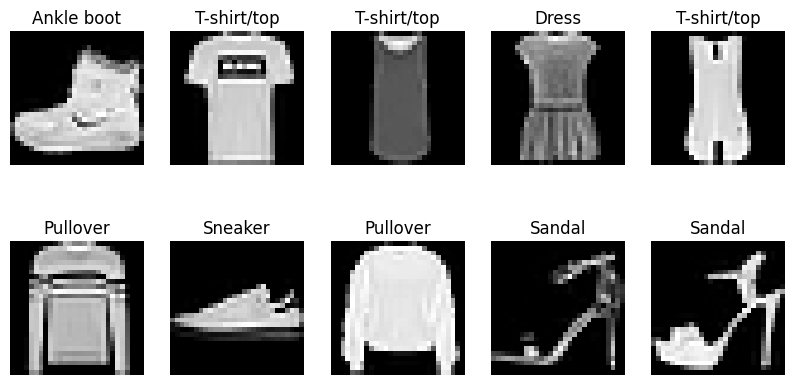

In [3]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]


plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [4]:
#  Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0


print("Data range after normalization:", X_train.min(), "to", X_train.max())


Data range after normalization: 0.0 to 1.0


In [5]:
#  One-hot Encoding

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
#  Build Neural Network

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])



model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=10, batch_size=128, verbose=1)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8925 - loss: 0.2901 - val_accuracy: 0.8853 - val_loss: 0.3216
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8917 - loss: 0.2942 - val_accuracy: 0.8854 - val_loss: 0.3219
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8929 - loss: 0.2879 - val_accuracy: 0.8858 - val_loss: 0.3238
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8929 - loss: 0.2885 - val_accuracy: 0.8847 - val_loss: 0.3178
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8983 - loss: 0.2762 - val_accuracy: 0.8841 - val_loss: 0.3200
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8983 - loss: 0.2670 - val_accuracy: 0.8860 - val_loss: 0.3171
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8993 - loss: 0.2707 - val_accuracy: 0.8875 - val_loss: 0.3122
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9022 - loss: 0.2624 - val_accuracy:

Test Accuracy: 0.8902999758720398


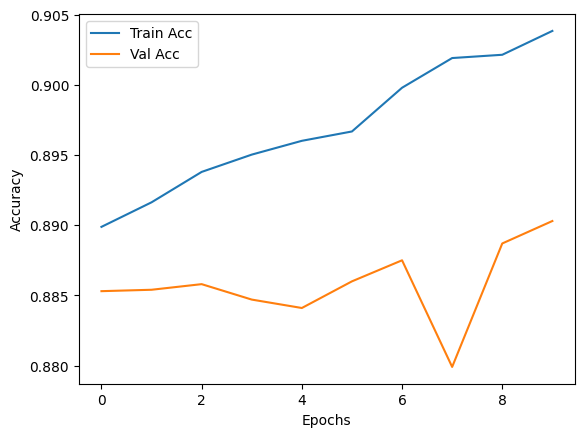

In [9]:
#  Model Evaluation

loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", acc)


plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)



print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.83      0.80      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.75      0.68      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

